<a href="https://colab.research.google.com/github/JakeOh/202105_itw_bd26/blob/main/lab_da/da10_str.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DataFrame의 문자열 컬럼 다루기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 파일이 저장된 경로
file_path = 'https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/movielens/movies.dat'

* `pd.read_csv` 함수를 사용해서 movies.dat 파일을 읽고 DataFrame 생성
* 데이터프레임 정보, head, ...
* 장르가 'Animation'인 영화는 몇 개?
* 장르가 로맨틱 코미디인 영화(Ramance & Comdey) 영화는 몇 개?
* 연도별 영화 개봉 숫자, 시각화

In [3]:
# 데이터프레임의 컬럼 이름으로 사용할 리스트
col_names = ['movie_id', 'title', 'genres']

In [4]:
movies = pd.read_csv(file_path, 
                     sep='::',           # sep=구분자(seperator). 값들을 구분하기 위해 사용된 문자열.
                     names=col_names,    # names=컬럼 이름으로 사용할 리스트.
                     encoding='cp1252',  # encoding=파일의 문자열 저장 방식.
                     engine='python')    # ParserWarning을 제거하기 위해서.

* seperator
    * `','`: 쉼표
    * `'\t'`: 탭 문자
    * `r'\s+'`: 한 글자 이상의 공백을 의미하는 정규 표현식(regular expression)
* encoding
    * `utf-8`: Linux, MacOS, Unix OS에서 기본으로 사용되는 문자열 저장 방식.
    * `cp949`: 한글 MS Windows에서 기본으로 사용되는 문자열 저장 방식.
    * `cp1252`: 영문 MS Windows에서 기본으로 사용되는 문자열 저장 방식.

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [6]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
movies.tail()

,movie_id,title,genres
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama
3882,3952,"Contender, The (2000)",Drama|Thriller


In [8]:
# Animation 장르의 영화들 - genres 컬럼의 문자열이 'Animation'을 포함
animations = movies[movies.genres.str.contains('Animation')]
animations

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
12,13,Balto (1995),Animation|Children's
47,48,Pocahontas (1995),Animation|Children's|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children's|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children's
...,...,...,...
3690,3759,Fun and Fancy Free (1947),Animation|Children's|Musical
3706,3775,Make Mine Music (1946),Animation|Children's|Musical
3707,3776,Melody Time (1948),Animation|Children's|Musical
3730,3799,Pokémon the Movie 2000 (2000),Animation|Children's


In [9]:
len(animations)

105

In [10]:
# 로맨틱 코미디 - (Romance & Comedy)
romantic_comedies = movies[(movies.genres.str.contains('Romance')) & 
                           (movies.genres.str.contains('Comedy'))]
romantic_comedies

,movie_id,title,genres
2,3,Grumpier Old Men (1995),Comedy|Romance
6,7,Sabrina (1995),Comedy|Romance
10,11,"American President, The (1995)",Comedy|Drama|Romance
38,39,Clueless (1995),Comedy|Romance
63,64,Two if by Sea (1996),Comedy|Romance
...,...,...,...
3679,3748,"Match, The (1999)",Comedy|Romance
3759,3829,Mad About Mambo (2000),Comedy|Romance
3804,3874,"Couch in New York, A (1996)",Comedy|Romance
3815,3885,Love & Sex (2000),Comedy|Romance


In [11]:
len(romantic_comedies)

204

In [12]:
# 연도별 영화 개봉 숫자, 시각화
t = 'Toy Story (1995)'
t[-5:-1]

'1995'

In [13]:
movies.title[-5:-1]
#> movies 데이터프레임의 title 컬럼 중에서 끝에서 5번째부터 끝에서 1번째 전까지 선택
#> movies.title.iloc[-5:-1]와 동일한 코드

3878       Meet the Parents (2000)
3879    Requiem for a Dream (2000)
3880              Tigerland (2000)
3881       Two Family House (2000)
Name: title, dtype: object

In [14]:
movies.title.str[-5:-1]
#> movies 데이터프레임의 title 컬럼의 문자열들을 각각 -5 ~ -1 까지 slicing -> pd.Series

0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
3878    2000
3879    2000
3880    2000
3881    2000
3882    2000
Name: title, Length: 3883, dtype: object

In [15]:
movies.title.str[-5:-1].astype('int')
#> 문자열(object)들을 원소로 갖는 Series를 정수(int)를 원소로 갖는 Series로 변환.

0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
3878    2000
3879    2000
3880    2000
3881    2000
3882    2000
Name: title, Length: 3883, dtype: int64

In [16]:
# movies 데이터프레임에 영화 개봉 연도(year) 컬럼(파생 변수)를 추가
movies['year'] = movies.title.str[-5:-1].astype('int')

In [17]:
movies

,movie_id,title,genres,year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,2000
3879,3949,Requiem for a Dream (2000),Drama,2000
3880,3950,Tigerland (2000),Drama,2000
3881,3951,Two Family House (2000),Drama,2000


In [18]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
 3   year      3883 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 121.5+ KB


In [19]:
result = movies['year'].value_counts()
result

1996    345
1995    342
1998    337
1997    315
1999    283
       ... 
1923      3
1929      3
1922      2
1920      2
1921      1
Name: year, Length: 81, dtype: int64

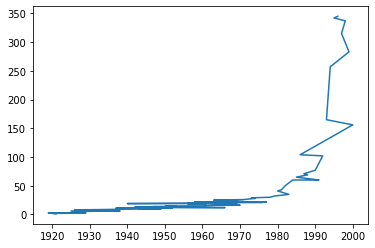

In [20]:
plt.plot(result.index, result.values)
plt.show()

`value_counts` 메서드의 결과는 값들의 내림차순으로 정렬되어 있음.
인덱스가 정렬되어 있지 않기 때문에, 선들이 지그재그로 그려지게 됨.
`value_counts`의 결과를 인덱스의 오름차순으로 정렬할 필요가 있음.

In [21]:
sorted_result = movies.year.value_counts().sort_index()
sorted_result

1919      3
1920      2
1921      1
1922      2
1923      3
       ... 
1996    345
1997    315
1998    337
1999    283
2000    156
Name: year, Length: 81, dtype: int64

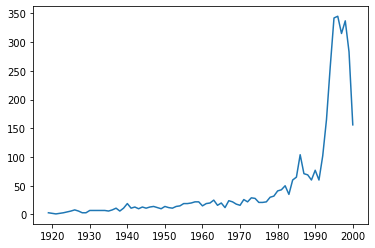

In [22]:
plt.plot(sorted_result.index, sorted_result.values)
plt.show()

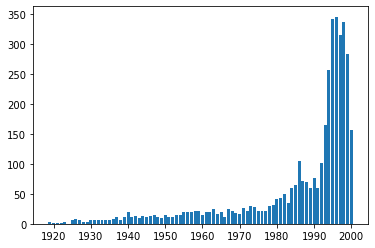

In [23]:
plt.bar(x=result.index, height=result.values)
plt.show()
#> 막대 그래프인 경우는 막대들이 그려지는 순서가 중요하지 않기 때문에 
# 인덱스로 정렬된 Series를 사용할 필요는 없다.

* movies 데이터프레임에 가장 자주 등장하는 장르 이름 상위 10개 찾고, 시각화

In [28]:
arr = ['animation', 'drama', 'animation', 'comedy', 'drama', 'comedy', 'drama']

In [30]:
# arr의 원소를 key로 하고, 그 원소가 리스트에 나오는 횟수를 value로 하는 dict를 생성.
arr_cnt = {}  # empty dict
for x in arr:  # 리스트에서 원소를 하나씩 꺼내면서 반복
    if x in arr_cnt.keys():  # 원소가 dict의 key로 존재하면
        arr_cnt[x] += 1  # 숫자를 1 증가
    else:  # 원소가 dict의 key로 존재하지 않으면, 처음 나오는 경우이므로
        arr_cnt[x] = 1

print(arr_cnt)

{'animation': 2, 'drama': 3, 'comedy': 2}


In [38]:
arr_cnt.items()  # (key, value) 튜플들의 리스트

dict_items([('animation', 2), ('drama', 3), ('comedy', 2)])

In [43]:
# dict를 value로 정렬: {'animation': 2, 'comedy': 2, 'drama': 3}
result = sorted(arr_cnt.items(), key=lambda x: x[1], reverse=False)
#> key=정렬 기준(함수), reverse=False(오름차순), True(내림차순)
print(result)
result2 = dict(result)  # tuple들의 list를 dict로 변환
print(result2)

[('animation', 2), ('comedy', 2), ('drama', 3)]
{'animation': 2, 'comedy': 2, 'drama': 3}


In [48]:
# pandas를 사용한 단어 개수 세기
pd.value_counts(arr)  #> 단어들이 index가 되고, 그 단어의 등장 횟수가 value인 pd.Series 객체

comedy       2
animation    2
drama        3
dtype: int64

In [56]:
genres = []  # 개별 영화 장르를 저장할 리스트
for s in movies.genres:
    genres.extend(s.split('|'))
    
len(genres)

6408

In [57]:
genres[:10]

['Animation',
 "Children's",
 'Comedy',
 'Adventure',
 "Children's",
 'Fantasy',
 'Comedy',
 'Romance',
 'Comedy',
 'Drama']

In [58]:
genre_counts = pd.value_counts(genres)
genre_counts  # value_counts 함수는 값들의 내림차순으로 정렬된 Series를 리턴.

Drama          1603
Comedy         1200
Action          503
Thriller        492
Romance         471
Horror          343
Adventure       283
Sci-Fi          276
Children's      251
Crime           211
War             143
Documentary     127
Musical         114
Mystery         106
Animation       105
Western          68
Fantasy          68
Film-Noir        44
dtype: int64

In [59]:
top10 = genre_counts.head(n=10)  # genre_counts.iloc[:10]
top10

Drama         1603
Comedy        1200
Action         503
Thriller       492
Romance        471
Horror         343
Adventure      283
Sci-Fi         276
Children's     251
Crime          211
dtype: int64

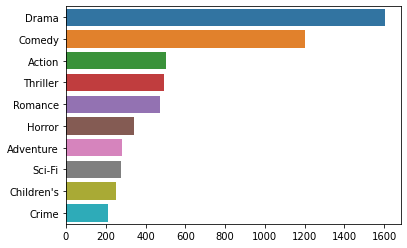

In [60]:
sns.barplot(x=top10.values, y=top10.index)
plt.show()